In [89]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
malla = pd.read_excel("Horarios 2023-1 - GUIA FINAL.xlsx", usecols=lambda x: x != 0, header=None, skiprows=2, nrows=453)

In [23]:
malla

,1,2,3,4,5
0,BFI01\nA,LU 10-12\nMI 10-12,R1-450 / zoom152\nR1-460 / zoom156,J. TELLO,40.0
1,NaN,VI 08-10\nVI 13-15,J3-182A / zoom91 (P)\nLAB F / zoom158 (L),A. PAREDES\nA. ALTAMIRANO,NaN
2,BFI01\nB,LU 14-16\nMI 14-16,J3-182B / zoom162\nJ3-182A / zoom162,S. CUSTODIO,40.0
3,NaN,VI 08-10\nVI 08-10,J3-232 / zoom157 (P)\nLAB FI / zoom163 / LAB F...,J. AMORETTI\nA. NAUPA,NaN
4,BFI01\nC,JU 08-10\nMA 08-10,J3-242 / zoom153\nJ3-232 / zoom152,C. ONCEBAY,40.0
...,...,...,...,...,...
446,NaN,MA 19-22,R1-430 / zoom25,C. CCAHUANCAMA,NaN
447,CL002\nC,MI 18-19,R1-421 / zoom25,C. CCAHUANCAMA,30.0
448,NaN,MI 19-22,R1-421 / zoom25,C. CCAHUANCAMA,NaN
449,CL002\nD,JU 13-14,R1-421 / zoom24,C. CCAHUANCAMA,30.0


In [113]:
url = 'https://fc.uni.edu.pe/escuela-profesional-de-ciencia-de-la-computacion/'

# Utiliza la función read_html() para leer las tablas de la página web
tablas = pd.read_html(url)
tablas[7] = tablas[7].drop(tablas[7].index[0])
tablas[7] = tablas[7].reset_index(drop=True)
ciclos = tablas[:10]
mallad = pd.concat(ciclos)
mallad = mallad[['Código', 'Nombre del curso','Créditos', 'Pre-requisitos']]
mallad = mallad[mallad['Código'].notnull()] 
mallad = mallad[mallad['Código'] != 'Código'] 



In [114]:
mallad

,Código,Nombre del curso,Créditos,Pre-requisitos
0,BFI01,Física I,5,Ninguno
1,BIC01,Introducción a la Computación,2,Ninguno
2,BMA01,Cálculo Diferencial,5,Ninguno
3,BMA03,Álgebra Lineal,4,Ninguno
4,BQU01,Química I,5,Ninguno
0,BMA02,Cálculo Integral,5,BMA01
1,BRC01,Redacción y Comunicación,2,Ninguno
2,CL002,Inglés I,2,Ninguno
3,CM1B2,Álgebra Lineal I,5,BMA03
4,CC112,Fundamentos de Programación,4,BIC01


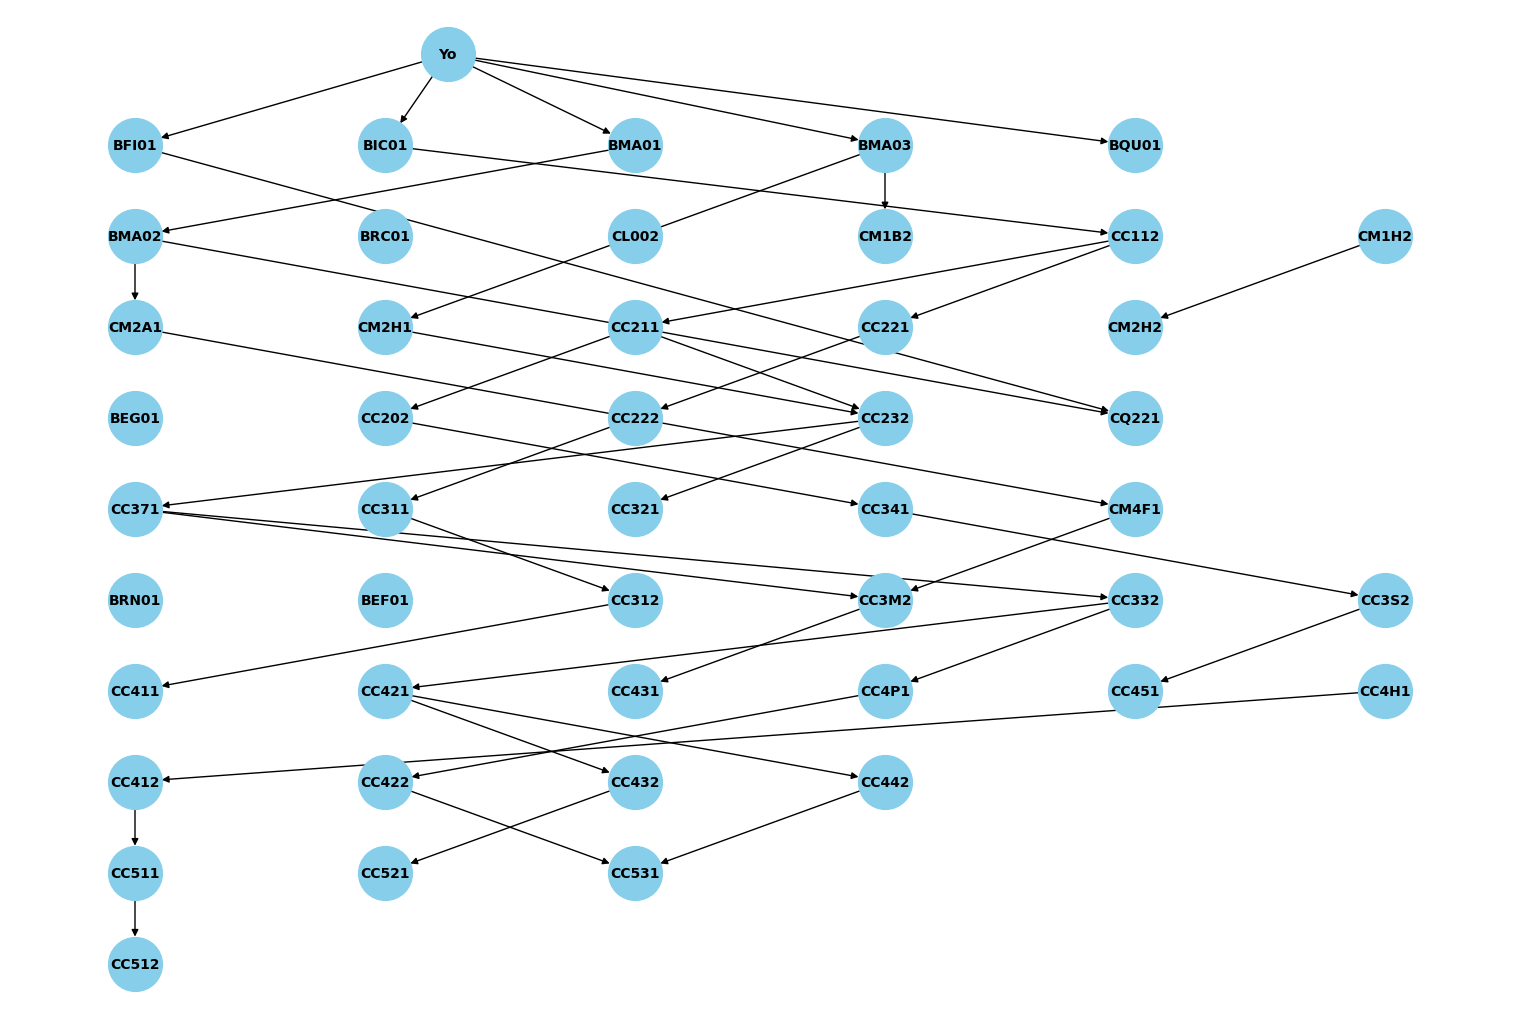

In [129]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir un nodo para el estudiante
G.add_node('Yo')

# Añadir nodos al grafo
for index, row in mallad.iterrows():
    G.add_node(row['Código'], 
               name=row['Nombre del curso'], 
               credits=row['Créditos'])

# Añadir aristas al grafo
for index, row in mallad.iterrows():
    if pd.notna(row['Pre-requisitos']) and row['Pre-requisitos'] != 'Ninguno':
        prereqs = row['Pre-requisitos'].split(' ')
        for prereq in prereqs:
            if prereq in G.nodes:  # Solo añadir la arista si el prerrequisito existe como nodo
                G.add_edge(prereq, row['Código'])

# Conectar el nodo del estudiante a todos los cursos del primer semestre
first_semester_nodes = [row['Código'] for i, row in mallad[:5].iterrows()]
for node in first_semester_nodes:
    G.add_edge('Yo', node)

# Crear un layout personalizado
pos = {'Yo': (max(mallad.index) / 2, 0)}  # El nodo del estudiante estará en la parte superior y en el centro
current_semester = 0
y = 0
x_spacing = 2  # Espaciado horizontal entre nodos
y_spacing = 2  # Espaciado vertical entre semestres
for index, row in mallad.iterrows():
    if index == 0:
        y += 1
    pos[row['Código']] = (index * x_spacing, -y * y_spacing)  # Los nodos con índice 0 estarán en la parte superior

# Crear una figura más grande
plt.figure(figsize=(15, 10))

# Dibujar el grafo
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', font_size=10, font_weight='bold')

# Ajustar los límites de los ejes para aumentar el espacio entre los nodos
plt.xlim(-1, max([v[0] for v in pos.values()]) + 1)
y_values = [v[1] for v in pos.values()]
plt.ylim(min(y_values) - 1, max(y_values) + 1)

# Mostrar el grafo
plt.show()